Let's Verify if the scaled images are labelled correctly!

In [1]:
import torch
import torchvision.transforms as transforms
import os
from torch.utils.data import Dataset
from PIL import Image
import matplotlib.pyplot as plt
from util import calculate_mean_std

resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

class PetDataset(Dataset):
    def __init__ (self, dir, training=True, transform=None):
        self.dir = os.path.join(dir, 'images')
        self.transform = transform
        self.training = training
        
        if self.training:
            file_path = os.path.join(dir, 'train_noses.txt')
        else:
            file_path = os.path.join(dir, 'test_noses.txt')
        
        with open(file_path, 'r') as file:
            self.data = []
            for line in file:
                parts = line.strip().split(',', 1)
                self.data.append(parts)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        line = self.data[index]
        image_name, raw_label = line[0], line[1]

        image_path = os.path.join(self.dir, image_name)
        image = Image.open(image_path).convert('RGB')

        original_size = image.size
        label = [int(coord) for coord in raw_label.strip('"()').split(', ')]

        if self.transform is not None:
            image = self.transform(image)

        new_size = (224, 224)  
        scale_x, scale_y = new_size[0] / original_size[0], new_size[1] / original_size[1]
        label = [label[0] * scale_x, label[1] * scale_y]

        return image, torch.tensor(label, dtype=torch.float32)


In [ ]:
if __name__ == "__main__":
    train_dataset = PetDataset(dir='data', training=True, transform=resize_transform)
    test_dataset = PetDataset(dir='data', training=False, transform=resize_transform)

    train_transform = transforms.Compose([resize_transform, transforms.Normalize(train_mean, train_std)])
    test_transform = transforms.Compose([resize_transform, transforms.Normalize(test_mean, test_std)])

    train_dataset = PetDataset(dir='data', training=True, transform=train_transform)
    test_dataset = PetDataset(dir='data', training=False, transform=test_transform)

In [ ]:
train_mean, train_std = calculate_mean_std(train_dataset)
test_mean, test_std = calculate_mean_std(test_dataset)

In [8]:
def unnormalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

In [9]:
train_mean = [0.4789, 0.4476, 0.3948]
train_std = [0.2259, 0.2229, 0.2255]

In [13]:
def show_scaled_images(dataset, num_images=10, mean=None, std=None):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        img, label = dataset[i]
        if mean is not None and std is not None:
            img = unnormalize(img, mean, std)
        plt.subplot(2, 5, i + 1)
        plt.imshow(transforms.ToPILImage()(img))
        plt.scatter(label[0], label[1], s=100, c='red', marker='x', edgecolors='white')
        plt.annotate('Nose', (label[0], label[1]), textcoords="offset points", xytext=(0,10), ha='center', color='black')
        plt.title(f'Image {i+1}')
        plt.axis('off')
    plt.show()

/tmp/ipykernel_220664/498594373.py:8: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(label[0], label[1], s=100, c='black', marker='x', edgecolors='white')


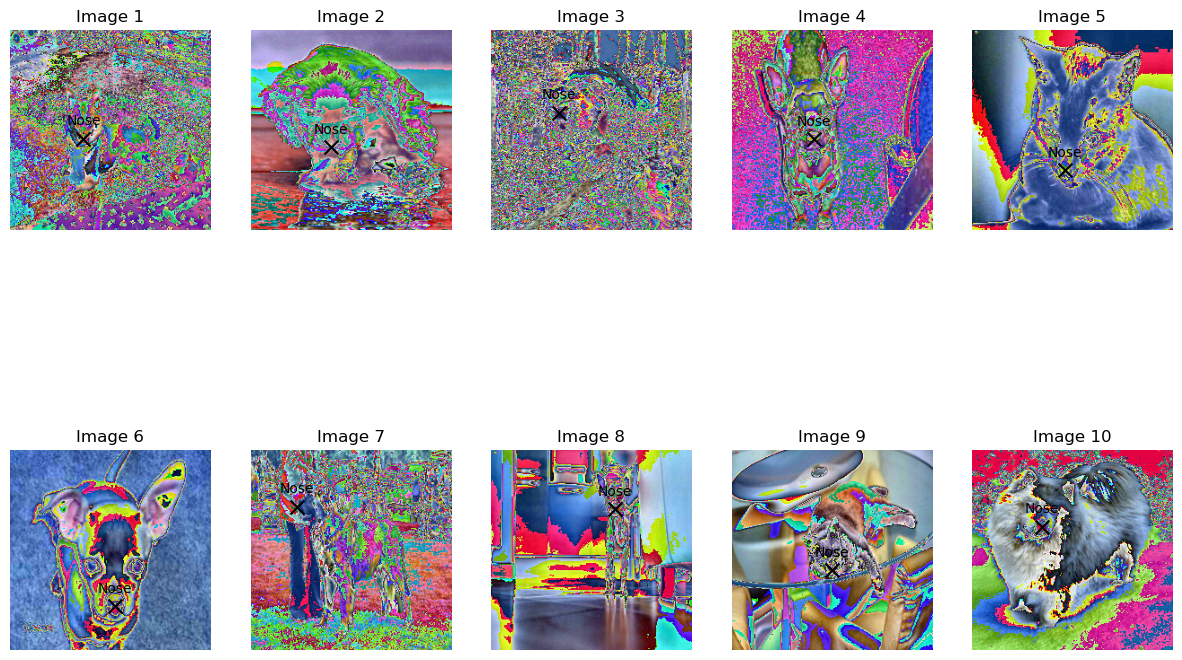

In [7]:
show_scaled_images(train_dataset, 10, train_mean, train_std)

/tmp/ipykernel_220664/3380370925.py:9: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(label[0], label[1], s=100, c='red', marker='x', edgecolors='white')


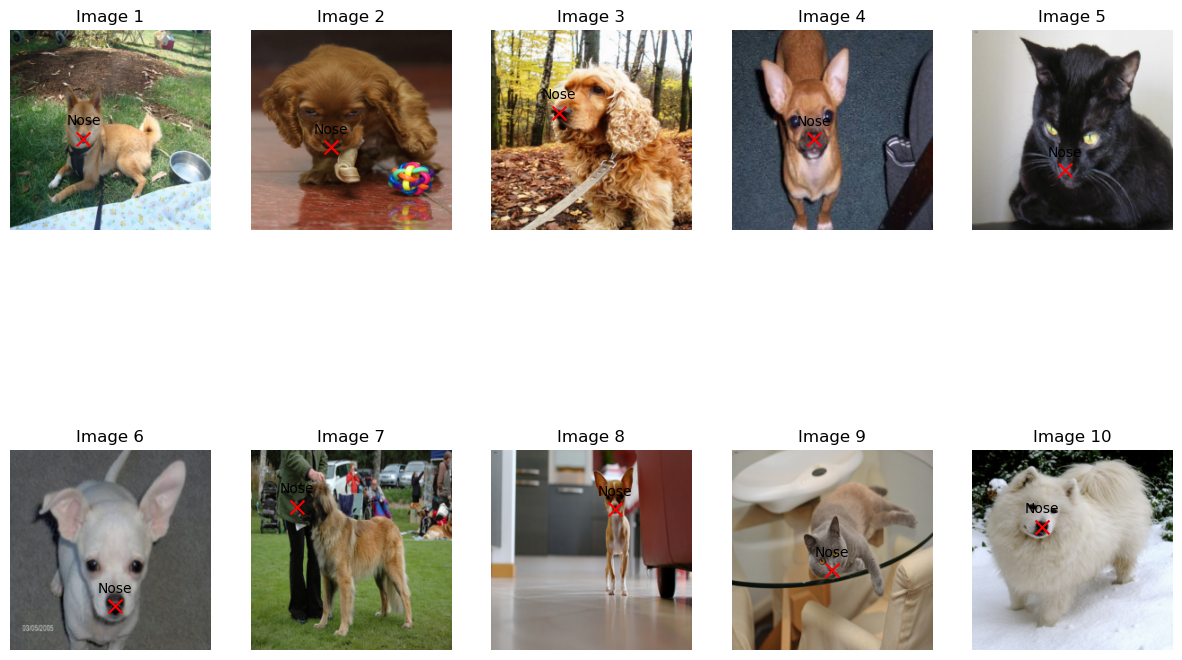

In [14]:
show_scaled_images(train_dataset, 10, train_mean, train_std)

They are.